In [3]:
import pandas as pd
import numpy as np

# Why Pandas

<ol>
    <li>Pandas library provides <b> high perfromance usable</b> data structures and <b> data analysis tools</b> for managing data tables
    <br></br></li>
    <li> Supports standard functions to create <b>pivot tables, column or row groupings, plotting graphs, joining tables like SQL, etc.</b> 
    <br></br></li>
</ol>


### Business UseCase:
Let assume that you are working on an airlines data and you want are recieving data continuously in the form of SQL tables or excel spreadsheets. You have created a detailed report from the data and the management really likes the key insights you are deriving from data. They want you to send this on the weekly level to the entire team.

You can either use SQL or excel spreadsheets to sit and create this every week or you can automate the task with a python script using pandas APIs. You can even automate sending the email with python.


# What is Pandas

There are three basic data structures in the  pandas library:
<ol>
    <li> <b>DataFrame</b>: This is the main data structure and it is a 2D table, similar to excel/spreadsheet tables with columns names and row labels.
    <br></br></li>
    <li><b>Series</b>: It is a 1D array, similar to a column in excel or excel spreadsheet with column name and row labels.
    <li> <b>Panel </b>: It is dictionary of dataframes. It is generally not used in practice and we will not be discussing it in the videos.
</ol>


# Pandas Series 

<ol>
    <li> Similar to python list for definition purpose.
    <br></br></li>
    <li> For operations purpose, it behaves similar to numpy one-dimensional ndarrays and can be passed directly to numpy functions.
</ol>


### Creating a Series

In [2]:
# Using Python list as series objects
s = pd.Series([-1.,-1,21,5])
s

0    -1.0
1    -1.0
2    21.0
3     5.0
dtype: float64

In [3]:
# Using python list as index labels and scalar object values

s = pd.Series(40, ["Chuck", "Darwin", "Elijah"])
s

Chuck     40
Darwin    40
Elijah    40
dtype: int64

In [4]:
# Using dictionary with indecies
dict1 = {"Newton": 6, "Chuck": 3, "Darwin": 8, "Elijah": 9}
s = pd.Series(dict1)
s



Newton    6
Chuck     3
Darwin    8
Elijah    9
dtype: int64

In [5]:
#We can also specify the indicies explicity to control what goes into the series 
s = pd.Series(dict1, index = ["Chuck", "Elijah"])
s

Chuck     3
Elijah    9
dtype: int64

In [6]:
# Using numpy array
#s = pd.Series(np.array([[1,2],[34,4]]))
s = pd.Series(np.array([1,2,34,4]))
s

0     1
1     2
2    34
3     4
dtype: int64

In [7]:
# Giving name to the series as 
s = pd.Series([6, -5.4], index=["Charles", "Chuck"], name="heights")
s

Charles    6.0
Chuck     -5.4
Name: heights, dtype: float64

### Operations on Series

In [8]:
# Use a series in numpy functions. Here we take exponential of the series
np.abs(s)    

Charles    6.0
Chuck      5.4
Name: heights, dtype: float64

Elementwise arithmetic operations on pandas Series are similar to numpy ndarray's:

In [9]:
s + np.array([1000,2000])

Charles    1006.0
Chuck      1994.6
Name: heights, dtype: float64

Broadcasting is similar to numpy. If you add a single number to Series, it is broadcasted throughout the series.

In [10]:
s + 1000

Charles    1006.0
Chuck       994.6
Name: heights, dtype: float64

The same is true for all binary operations such as multiplication, division, subtraction or evern conditionals operations

In [11]:
s < 0

Charles    False
Chuck       True
Name: heights, dtype: bool

### Accessing elements of Series (Indexing)

<ol>
    <li> Each item in a Series object has a unique identifier called the *index label*.
    <br></br></li>
    <li> By default, it is  the rank of the item in the Series (starting at 0) but you can also set the index labels manually
     <br></br></li>
     <li> You can also use the series as a dictionary with manually set indexing as well as integer index like regular list.
    
</ol>

In [12]:
s2

NameError: name 's2' is not defined

Using as a dictionary

In [13]:
s2["Chuck"]

NameError: name 's2' is not defined

Using as a list with integer index

In [14]:
s2[1]

NameError: name 's2' is not defined

To make it clear when you are accessing by label or by integer location, it is recommended to always use the loc attribute when accessing by label, and the iloc attribute when accessing by integer location:

In [15]:
s2.loc["Chuck"]

NameError: name 's2' is not defined

In [16]:
s2.iloc[1]

NameError: name 's2' is not defined

Slicing a Series also slices the index labels. This can lead to <b>unexpected values being accessed when using the default numeric labels</b>, so be careful!

In [17]:
s3 = s2.iloc[1:3]
print(s3)
s3.loc["Newtown"]

NameError: name 's2' is not defined

In [18]:
s2 = pd.Series([1000, 1001, 1002, 1003])
s2

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [19]:
s2_slice = s2[1:]
s2_slice

1    1001
2    1002
3    1003
dtype: int64

The first element has index label 1. The element with index label 0 is absent from the slice

In [20]:
s2_slice[0]


KeyError: 0

But we  can access elements by integer location using the iloc attribute. 

In [21]:
s2_slice.iloc[0]

1001

So, we should <b>always use loc and iloc</b> to access Series objects.

### Automatic alignment
For operations involving multiple series pandas automatically aligns items by matching the index labels.

In [22]:
s2 = pd.Series([231, -23, -99, 100], index=["Newton", "Chuck", "Darwin", "Elijah"])
s3 = pd.Series([122, -312, 123, -20], index=["Charles", "Darwin", "Chuck", "Elijah"])
print(s2)
print(s3)

s2 + s3

Newton    231
Chuck     -23
Darwin    -99
Elijah    100
dtype: int64
Charles    122
Darwin    -312
Chuck      123
Elijah     -20
dtype: int64


Charles      NaN
Chuck      100.0
Darwin    -411.0
Elijah      80.0
Newton       NaN
dtype: float64

Since <b>Charles</b> is missing from s2 and <b>Newton</b> is missing from s3,  these have a `NaN` result value. (ie. Not-a-Number means <b>missing</b>).

Automatic alignment is very handy when working with data that may come from various sources with varying structure and missing items. But if you forget to set the right index labels, you can have surprising results:

In [23]:
s5 = pd.Series([100,-10,999,-999])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [231 -23 -99 100]
s5 = [ 100  -10  999 -999]


0        NaN
1        NaN
2        NaN
3        NaN
Chuck    NaN
Darwin   NaN
Elijah   NaN
Newton   NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result.

### Plotting a Series
Using matplotlib is easy with a <b>Series.plot()</b> call

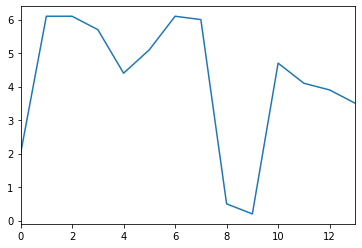

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

pressure = [2,6.1,6.1,5.7,4.4,5.1,6.1,6,.5,.2,4.7,4.1,3.9,3.5]

s7 = pd.Series(pressure, name="Pressure")

s7.plot()
plt.show()

There are a variety of plotting options in pandas and we will visiting those in the visualisation section.

# DataFrame objects

A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. We can define expressions to <b>compute columns based on other columns, create pivot-tables, group rows, draw graphs, </b> etc. 


You can consider DataFrames as dictionaries of Series.



### Creating a DataFrame
You can create a DataFrame by passing a dictionary of Series objects:

In [25]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [26]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [27]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [28]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [29]:
values = np.array([
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ])
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,nan,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,nan,112


To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [30]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,nan
bob,Dancing,3


It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [31]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Multi-indexing
If all columns are tuples of the same size, then they are understood as a multi-index. The same goes for row index labels. For example:

In [32]:
dict1 = {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }

print(dict1)

{('public', 'birthyear'): {('Paris', 'alice'): 1985, ('Paris', 'bob'): 1984, ('London', 'charles'): 1992}, ('public', 'hobby'): {('Paris', 'alice'): 'Biking', ('Paris', 'bob'): 'Dancing'}, ('private', 'weight'): {('Paris', 'alice'): 68, ('Paris', 'bob'): 83, ('London', 'charles'): 112}, ('private', 'children'): {('Paris', 'alice'): nan, ('Paris', 'bob'): 3, ('London', 'charles'): 0}}


In [46]:
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

You can now get a `DataFrame` containing all the `"public"` columns very simply:

In [47]:
d5["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

In [48]:
print(d5["public", "hobby"])
# Same result as 
print(d5["public"]["hobby"])

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object
London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: hobby, dtype: object


## Dropping a level
Let's look at `d5` again:

In [44]:
d5

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

There are two levels of columns, and two levels of indices. We can drop a column level by calling `droplevel()` (the same goes for indices):

In [49]:
#d5.columns = d5.columns.droplevel(level = 0)

#d5.columns = d5.columns.droplevel(level = 0)
d5.index = d5.index.droplevel(level=10)
d5

public          private         
                         birthyear    hobby  weight children
(1992, nan, 112, 0.0)         1992      NaN     112      0.0
(1985, Biking, 68, nan)       1985   Biking      68      NaN
(1984, Dancing, 83, 3.0)      1984  Dancing      83      3.0

## Transposing
You can swap columns and indices using the `T` attribute:

In [64]:
d6 = d5.T
d6

,Paris,Paris,London
birthyear,1985,1984,1992
hobby,Biking,Dancing,NaN
weight,68,83,112
children,NaN,3,0


In [51]:
d5.transpose()

(1992, nan, 112, 0.0) (1985, Biking, 68, nan)  \
public  birthyear                  1992                    1985   
        hobby                       NaN                  Biking   
private weight                      112                      68   
        children                      0                     NaN   

                  (1984, Dancing, 83, 3.0)  
public  birthyear                     1984  
        hobby                      Dancing  
private weight                          83  
        children                         3

## Stacking and unstacking levels
Calling the `stack()` method will push the lowest column level after the lowest index:

In [68]:
d6 = d5 
d6

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [69]:
d7 = d6.stack()
d7

private   public
Paris  alice   birthyear      NaN     1985
               hobby          NaN   Biking
               weight        68.0      NaN
       bob     birthyear      NaN     1984
               children       3.0      NaN
               hobby          NaN  Dancing
               weight        83.0      NaN
London charles birthyear      NaN     1992
               children       0.0      NaN
               weight       112.0      NaN

Note that many `NaN` values appeared. This makes sense because many new combinations did not exist before (eg. there was no `bob` in `London`).

Calling `unstack()` will do the reverse, once again creating many `NaN` values.

In [70]:
d8 = d7.unstack()
d8

private                          public                    \
               birthyear children hobby weight birthyear children    hobby   
London charles       NaN      0.0   NaN  112.0      1992      NaN      NaN   
Paris  alice         NaN      NaN   NaN   68.0      1985      NaN   Biking   
       bob           NaN      3.0   NaN   83.0      1984      NaN  Dancing   

                       
               weight  
London charles    NaN  
Paris  alice      NaN  
       bob        NaN

If we call `unstack` again, we end up with a `Series` object:

In [72]:
d9 = d8.unstack()
dummy = d9.unstack()
dummy

private  birthyear  alice    London        NaN
                             Paris         NaN
                    bob      London        NaN
                             Paris         NaN
                    charles  London        NaN
                             Paris         NaN
         children   alice    London        NaN
                             Paris         NaN
                    bob      London        NaN
                             Paris           3
                    charles  London          0
                             Paris         NaN
         hobby      alice    London        NaN
                             Paris         NaN
                    bob      London        NaN
                             Paris         NaN
                    charles  London        NaN
                             Paris         NaN
         weight     alice    London        NaN
                             Paris          68
                    bob      London        NaN
             

In [74]:
d9

private                                                             \
       birthyear             children              hobby             weight   
           alice bob charles    alice  bob charles alice bob charles  alice   
London       NaN NaN     NaN      NaN  NaN     0.0   NaN NaN     NaN    NaN   
Paris        NaN NaN     NaN      NaN  3.0     NaN   NaN NaN     NaN   68.0   

        ...    public                                                        \
        ... birthyear children                hobby                  weight   
        ...   charles    alice  bob charles   alice      bob charles  alice   
London  ...      1992      NaN  NaN     NaN     NaN      NaN     NaN    NaN   
Paris   ...       NaN      NaN  NaN     NaN  Biking  Dancing     NaN    NaN   

                     
                     
        bob charles  
London  NaN     NaN  
Paris   NaN     NaN  

[2 rows x 24 columns]

The `stack()` and `unstack()` methods let you select the `level` to stack/unstack. You can even stack/unstack multiple levels at once:

In [75]:
d10 = d9.stack(level = (0,1))
d10

alice      bob charles
London private children      NaN      NaN       0
               weight        NaN      NaN     112
       public  birthyear     NaN      NaN    1992
Paris  private children      NaN        3     NaN
               weight         68       83     NaN
       public  birthyear    1985     1984     NaN
               hobby      Biking  Dancing     NaN

## Most methods return modified copies
As you may have noticed, the `stack()` and `unstack()` methods do not modify the object they apply to. Instead, they work on a copy and return that copy. This is true of most methods in pandas.

## Accessing rows
Let's go back to the `people` `DataFrame`:

In [76]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [77]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

You can also access rows by integer location using the `iloc` attribute:

In [78]:
people.iloc[1]

birthyear       1984
hobby        Dancing
weight            83
children           3
Name: bob, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [79]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Finally, you can pass a boolean array to get the matching rows:

In [80]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [81]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [82]:
people["birthyear"] < 1990

alice       True
bob         True
charles    False
Name: birthyear, dtype: bool

This is most useful when combined with boolean expressions:

In [74]:
people[people["birthyear"] < 1990]

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83


## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [106]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [107]:
people["age"] = 2020 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")        # removes the columns "birthyear"
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,35,True
bob,Dancing,83,36,True
charles,NaN,112,28,False


In [108]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [109]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,35,True,NaN
bob,Dancing,83,36,True,0.0
charles,NaN,112,28,False,5.0


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [110]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,35,True,NaN
bob,Dancing,181,83,36,True,0.0
charles,NaN,185,112,28,False,5.0


## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [116]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0,
    height_gt_25 = people['height']>25
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets,height_gt_25
alice,Biking,172,68,35,True,NaN,22.985398,False,True
bob,Dancing,181,83,36,True,0.0,25.335002,False,True
charles,NaN,185,112,28,False,5.0,32.724617,True,True


## Evaluating an expression
A great feature supported by pandas is expression evaluation. This relies on the `numexpr` library which must be installed.

In [117]:
people.eval("weight / (height/100) ** 2 > 25")

alice      False
bob         True
charles     True
dtype: bool

Assignment expressions are also supported. Let's set `inplace=True` to directly modify the `DataFrame` rather than getting a modified copy:

In [119]:
people.eval("body_mass_index = weight / (height/100) ** 2", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index
alice,Biking,172,68,35,True,NaN,22.985398
bob,Dancing,181,83,36,True,0.0,25.335002
charles,NaN,185,112,28,False,5.0,32.724617


You can use a local or global variable in an expression by prefixing it with `'@'`:

In [120]:
overweight_threshold = 30
people.eval("overweight = body_mass_index > @overweight_threshold", inplace=True)
people

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,35,True,NaN,22.985398,False
bob,Dancing,181,83,36,True,0.0,25.335002,False
charles,NaN,185,112,28,False,5.0,32.724617,True


## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [88]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
bob,Dancing,181,83,34,True,0.0,25.335002,False


## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [122]:
people.sort_index(ascending=True)

,hobby,height,weight,age,over 30,pets,body_mass_index,overweight
alice,Biking,172,68,35,True,NaN,22.985398,False
bob,Dancing,181,83,36,True,0.0,25.335002,False
charles,NaN,185,112,28,False,5.0,32.724617,True


Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [123]:
people.sort_index(axis=1, inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
alice,35,22.985398,172,Biking,True,False,NaN,68
bob,36,25.335002,181,Dancing,True,False,0.0,83
charles,28,32.724617,185,NaN,False,True,5.0,112


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [126]:
people.sort_values(by=["age","height"], inplace=True)
people

,age,body_mass_index,height,hobby,over 30,overweight,pets,weight
charles,28,32.724617,185,NaN,False,True,5.0,112
alice,35,22.985398,172,Biking,True,False,NaN,68
bob,36,25.335002,181,Dancing,True,False,0.0,83


## Plotting a `DataFrame`
Just like for `Series`, pandas makes it easy to draw nice graphs based on a `DataFrame`.

For example, it is trivial to create a line plot from a `DataFrame`'s data by calling its `plot` method:

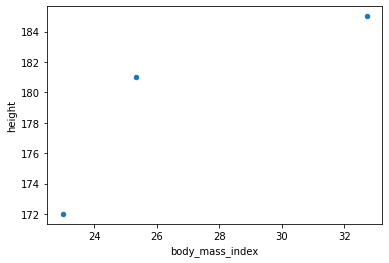

In [129]:
people.plot(kind = "scatter", x = "body_mass_index", y = "height")
#plt.show()

You can pass extra arguments supported by matplotlib's functions. For example, we can create scatterplot and pass it a list of sizes using the `s` argument of matplotlib's `scatter()` function:

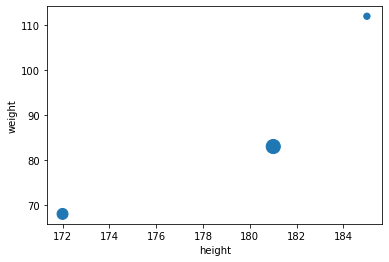

In [131]:
people.plot(kind = "scatter", x = "height", y = "weight", s=[40, 120, 200])
#plt.show()

Again, there are way too many options to list here: the best option is to scroll through the [Visualization](http://pandas.pydata.org/pandas-docs/stable/visualization.html) page in pandas' documentation, find the plot you are interested in and look at the example code.

## Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [132]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [133]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [134]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [137]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [138]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [139]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [99]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [100]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [140]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

If you add a `Series` object to a `DataFrame` (or execute any other binary operation), pandas attempts to broadcast the operation to all *rows* in the `DataFrame`. This only works if the `Series` has the same size as the `DataFrame`s rows. For example, let's substract the `mean` of the `DataFrame` (a `Series` object) from the `DataFrame`:

In [141]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [142]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

In [102]:
grades - grades.mean()  # equivalent to: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
charles,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


If you want to substract the global mean from every grade, here is one way to do it:

In [104]:
grades - grades.values.mean() # substracts the global mean (8.00) from all grades

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
charles,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Automatic alignment
Similar to `Series`, when operating on multiple `DataFrame`s, pandas automatically aligns them by row index label, but also by column names. Let's create a `DataFrame` with bonus points for each person from October to December:

In [149]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [144]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [145]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [146]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
charles,NaN,5.0,11.0,NaN
colin,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


## Aggregating with `groupby`
Similar to the SQL language, you can group pandas dataframe into by different columns and perform computations. 

Lets take the grades dataframe and introduce a column with `NaN` values to understand their handling

In [25]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [26]:
grades["hobby"] = ["Football", np.nan, "Dancing", "Football"]
grades

,sep,oct,nov,hobby
alice,8,8,9,Football
bob,10,9,9,NaN
charles,4,8,2,Dancing
darwin,9,10,10,Football


Now let's group data in this `DataFrame` by hobby:

In [31]:
grouped_grades = grades.groupby(["hobby"])
grouped_grades

Now lets compute some statistics on the data

In [32]:
grouped_grades.mean()

,sep,oct,nov
hobby,,,
Dancing,4.0,8.0,2.0
Football,8.5,9.0,9.5


In [36]:
grouped_grades.median()

,sep,oct,nov
hobby,,,
Dancing,4.0,8.0,2.0
Football,8.5,9.0,9.5


Note that the `NaN` values have been skipped when computing the statistics.

## Pivot tables

Similar to spreadsheets, you can create [pivot tables](https://en.wikipedia.org/wiki/Pivot_table) in pandas for quick data summarization. 
Let's create a simple `DataFrame` to understand this:

In [37]:
bonus_array = np.array([[0,np.nan,2],[np.nan,1,0],[0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=["oct", "nov", "dec"], index=["bob","colin", "darwin", "charles"])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
colin,NaN,1.0,0.0
darwin,0.0,1.0,0.0
charles,3.0,3.0,0.0


In [38]:
more_grades = bonus_points.stack().reset_index()
more_grades

,level_0,level_1,0
0,bob,oct,0.0
1,bob,dec,2.0
2,colin,nov,1.0
3,colin,dec,0.0
4,darwin,oct,0.0
5,darwin,nov,1.0
6,darwin,dec,0.0
7,charles,oct,3.0
8,charles,nov,3.0
9,charles,dec,0.0


In [39]:
more_grades = bonus_points.stack().reset_index()

more_grades.columns = ["name", "month", "grade"]

more_grades["bonus"] = [np.nan, np.nan, np.nan, 0, np.nan, 1, 3, 3, 0, 1]

more_grades

,name,month,grade,bonus
0,bob,oct,0.0,NaN
1,bob,dec,2.0,NaN
2,colin,nov,1.0,NaN
3,colin,dec,0.0,0.0
4,darwin,oct,0.0,NaN
5,darwin,nov,1.0,1.0
6,darwin,dec,0.0,3.0
7,charles,oct,3.0,3.0
8,charles,nov,3.0,0.0
9,charles,dec,0.0,1.0


Now we can use the `pd.pivot_table()` function to group by the `name` column. By default, `pivot_table()` computes the mean of each numeric column:

In [40]:
pd.pivot_table(more_grades, index="name")

,bonus,grade
name,,
bob,NaN,1.000000
charles,1.333333,2.000000
colin,0.000000,0.500000
darwin,2.000000,0.333333


We can change the aggregation function by setting the `aggfunc` argument, and we can also specify the list of columns whose values will be aggregated:

In [41]:
pd.pivot_table(more_grades, index="name", values=["grade","bonus"], aggfunc=np.max)

,bonus,grade
name,,
bob,NaN,2.0
charles,3.0,3.0
colin,0.0,1.0
darwin,3.0,1.0


We can also specify the `columns` to aggregate over horizontally, and request the grand totals for each row and column by setting `margins=True`:

In [42]:
pd.pivot_table(more_grades, index="name", values="grade", columns="month", margins=True)

month,dec,nov,oct,All
name,,,,
bob,2.0,NaN,0.0,1.000000
charles,0.0,3.000000,3.0,2.000000
colin,0.0,1.000000,NaN,0.500000
darwin,0.0,1.000000,0.0,0.333333
All,0.5,1.666667,1.0,1.000000


Finally, we can specify multiple index or column names, and pandas will create multi-level indices:

In [124]:
pd.pivot_table(more_grades, index=("name", "month"), margins=True)

bonus  grade
name    month              
alice   nov      NaN   9.00
        oct      NaN   8.00
        sep      NaN   8.00
bob     nov    2.000  10.00
        oct      NaN   9.00
        sep    0.000  10.00
charles nov    0.000   5.00
        oct    3.000  11.00
        sep    3.000   4.00
darwin  nov    0.000  11.00
        oct    1.000  10.00
        sep    0.000   9.00
All            1.125   8.75

# Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. We will see how to save in csv, html and json format. 

Let's start by creating a `DataFrame`:

In [52]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Saving
Let's save it to CSV, HTML and JSON:

In [53]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Done! Let's take a peek at what was saved:

In [54]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Note that the <b>index is saved as the first column (with no name)</b> in a CSV file, as `<th>` tags in HTML and as keys in JSON.

Saving to other formats works very similarly, but some formats require extra libraries to be installed. For example, saving to Excel requires the openpyxl library:

In [46]:
!pip install openpyxl
try:
    my_df.to_excel("my_df.xlsx", sheet_name='People')
except ImportError as e:
    print(e)

## Loading
Now let's load our CSV file back into a `DataFrame`:

In [55]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


# Combining `DataFrame`s

## SQL-like joins
One powerful feature of pandas is it's ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. Let's start by creating a couple of simple `DataFrame`s:

In [4]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [5]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Now let's join these `DataFrame`s using the `merge()` function:

In [6]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Note that both `DataFrame`s have a column named `state`, so in the result they got renamed to `state_x` and `state_y`.

Also, note that Cleveland, Salt Lake City and Houston were dropped because they don't exist in *both* `DataFrame`s. This is the equivalent of a SQL `INNER JOIN`. If you want a `FULL OUTER JOIN`, where no city gets dropped and `NaN` values are added, you must specify `how="outer"`:

In [7]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


Of course `LEFT OUTER JOIN` is also available by setting `how="left"`: only the cities present in the left `DataFrame` end up in the result. Similarly, with `how="right"` only cities in the right `DataFrame` appear in the result. For example:

In [8]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


If the key column names differ, you must use `left_on` and `right_on`. For example:

In [9]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them. That's what `concat()` is for:

In [10]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

<ipython-input-10-7a9b618ffc40>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  result_concat = pd.concat([city_loc, city_pop])


,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). Pandas handles this rather gracefully:

In [11]:
result_concat.loc[3]

,city,lat,lng,population,state
3,Cleveland,41.473508,-81.739791,NaN,OH
3,San Francisco,NaN,NaN,808976.0,California


Or you can tell pandas to just ignore the index:

In [12]:
pd.concat([city_loc, city_pop], ignore_index=True)

<ipython-input-12-ab7178b112b0>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pd.concat([city_loc, city_pop], ignore_index=True)


,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
5,San Francisco,NaN,NaN,808976.0,California
6,New York,NaN,NaN,8363710.0,New-York
7,Miami,NaN,NaN,413201.0,Florida
8,Houston,NaN,NaN,2242193.0,Texas


Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned:

In [145]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`:

In [146]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In this case it really does not make much sense because the indices do not align well (eg. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

In [14]:
pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)

<ipython-input-14-48a737537456>:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  pd.concat([city_loc.set_index("city"), city_pop.set_index("city")], axis=1)


,state,lat,lng,population,state
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas
Miami,FL,25.791100,-80.320733,413201.0,Florida
New York,NY,40.705649,-74.008344,8363710.0,New-York
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
San Francisco,CA,37.781334,-122.416728,808976.0,California


This looks a lot like a `FULL OUTER JOIN`, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column is now the index.

The `append()` method is a useful shorthand for concatenating `DataFrame`s vertically:

In [15]:
city_loc.append(city_pop)

/Users/himanshusharma/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


,city,lat,lng,population,state
0,San Francisco,37.781334,-122.416728,NaN,CA
1,New York,40.705649,-74.008344,NaN,NY
2,Miami,25.791100,-80.320733,NaN,FL
3,Cleveland,41.473508,-81.739791,NaN,OH
4,Salt Lake City,40.755851,-111.896657,NaN,UT
3,San Francisco,NaN,NaN,808976.0,California
4,New York,NaN,NaN,8363710.0,New-York
5,Miami,NaN,NaN,413201.0,Florida
6,Houston,NaN,NaN,2242193.0,Texas


As always in pandas, the `append()` method does *not* actually modify `city_loc`: it works on a copy and returns the modified copy.

In [13]:
#Some functions to be kept on the tips

'''
describe()
head()
tail()
info()
'''

'\ndescribe()\nhead()\ntail()\ninfo()\n'

# What next?
As you probably noticed by now, pandas is quite a large library with *many* features. Although we went through the most important features, there is still a lot to discover. Probably the best way to learn more is to get your hands dirty with some real-life data. It is also a good idea to go through pandas' excellent [documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), in particular the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html).